## logistic regression

● For predicting the categorical dependent variable using a given set of independent variables.

● Logistic regression predicts the output of a categorical dependent variable. Therefore the
outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or
False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic 
values which lie between 0 and 1.

● Logistic Regression is much similar to Linear Regression except that how they are used.
Linear Regression is used for solving Regression problems, whereas Logistic 
regression is used for solving the classification problems.

● In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic
function, which predicts two maximum values (0 or 1).

● The curve from the logistic function indicates the likelihood ofsomething such as
whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

● Logistic Regression is a significant machine learning algorithm because it hasthe
ability to provide probabilities and classify new data using continuous and discrete
datasets.

● Logistic Regression can be used to classify the observations using different types of data 
and can easily determine the most effective variables used for the classification. The below
image is showing the logistic function

![Alt text](image.png)

# *Confusion Matrix*

● A confusion matrix is a table that is used to define the performance of a classification 
algorithm. A confusion matrix visualizes and summarizes the performance of a 
classification algorithm.
 
![Alt text](image-1.png)

 Accuracy, Precision, Recall will be help to analyze the model
# *Accuracy:*

 Accuracy is used to measure the performance of the model. It 
is the ratio of Total correct instances to the total instances

# *Precision:* 

Precision is a measure of how accurate a model’s positive predictions are. 
It is defined as the ratio of true positive predictions to the total number of 
positive predictions made by the model
Recall measures the effectiveness of a classification model in identifying 
all relevant instances from a dataset. It is the ratio of the number of true 
positive (TP) instances to the sum of true positive and false negative (FN) 
instances.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [4]:
df.head

<bound method NDFrame.head of      User ID  Gender  Age  AnnualSalary  Purchased
0        385       1   35         20000          0
1        681       1   40         43500          0
2        353       1   49         74000          0
3        895       1   40        107500          1
4        661       1   25         79000          0
..       ...     ...  ...           ...        ...
995      863       1   38         59000          0
996      800       0   47         23500          0
997      407       0   28        138500          1
998      299       0   48        134000          1
999      687       0   44         73500          0

[1000 rows x 5 columns]>

# Assuming the target variable is named 'target_column_name'

In [5]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
categorical_columns = ['Gender']
numerical_columns = ['Age', 'AnnualSalary']

#  Creating two separate pipelines for transforming numeric and categorical data.

In [27]:

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [10]:
logistic_regression_model = LogisticRegression()

In [11]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_regression_model)])

## `pipeline.fit(X_train, y_train)` is fitting the pipeline model to the training data. This means that it is training the model using the features `X_train` and the corresponding labels `y_train`.


In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender'])])),
                ('classifier', LogisticRegression())])

In [13]:

y_pred = pipeline.predict(X_test)

# The code is calculating and printing the accuracy, confusion matrix, and classification report for a classification model.

In [14]:

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.79
Confusion Matrix:
[[103   9]
 [ 33  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       112
           1       0.86      0.62      0.72        88

    accuracy                           0.79       200
   macro avg       0.81      0.77      0.78       200
weighted avg       0.80      0.79      0.78       200



# Making Confusion Matrix

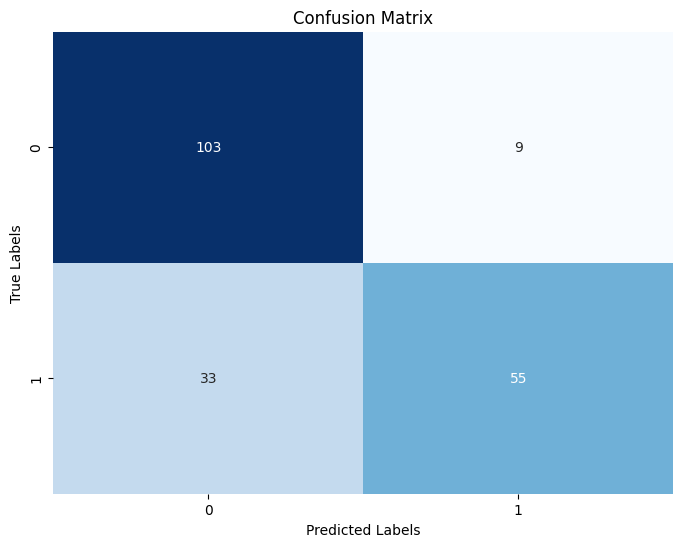

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualising the Training set results

C:\Users\simon\AppData\Local\Temp\ipykernel_19112\553718874.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


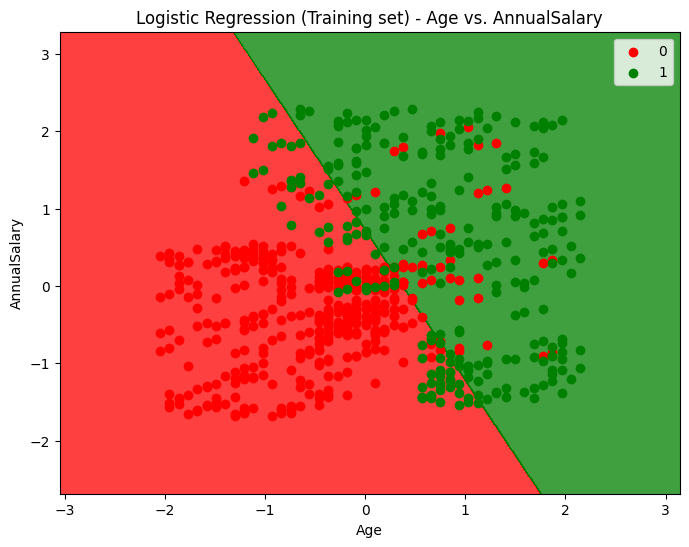

In [21]:
from matplotlib.colors import ListedColormap


# Visualizing the Training set results (Age vs. AnnualSalary)
plt.figure(figsize=(8, 6))

# Training set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set) - Age vs. AnnualSalary')
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.legend()
plt.show()


# Visualising test set result

C:\Users\simon\AppData\Local\Temp\ipykernel_19112\1036391450.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


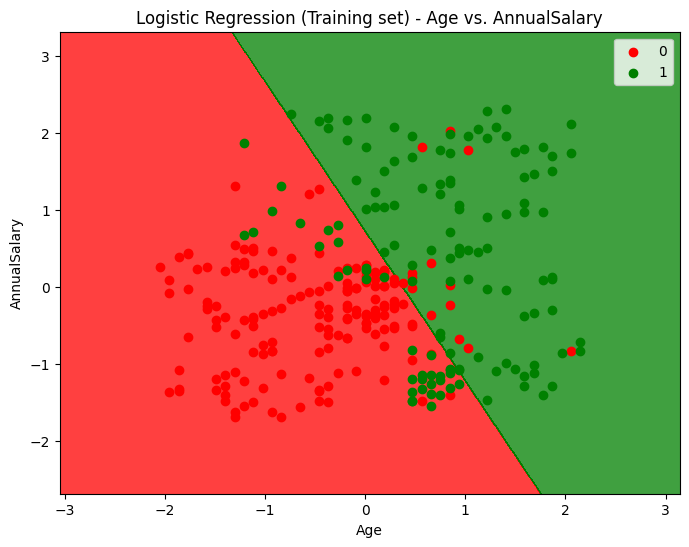

In [22]:
from matplotlib.colors import ListedColormap


# Visualizing the Training set results (Age vs. AnnualSalary)
plt.figure(figsize=(8, 6))

# Training set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set) - Age vs. AnnualSalary')
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.legend()
plt.show()

# Creating a box-plot

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


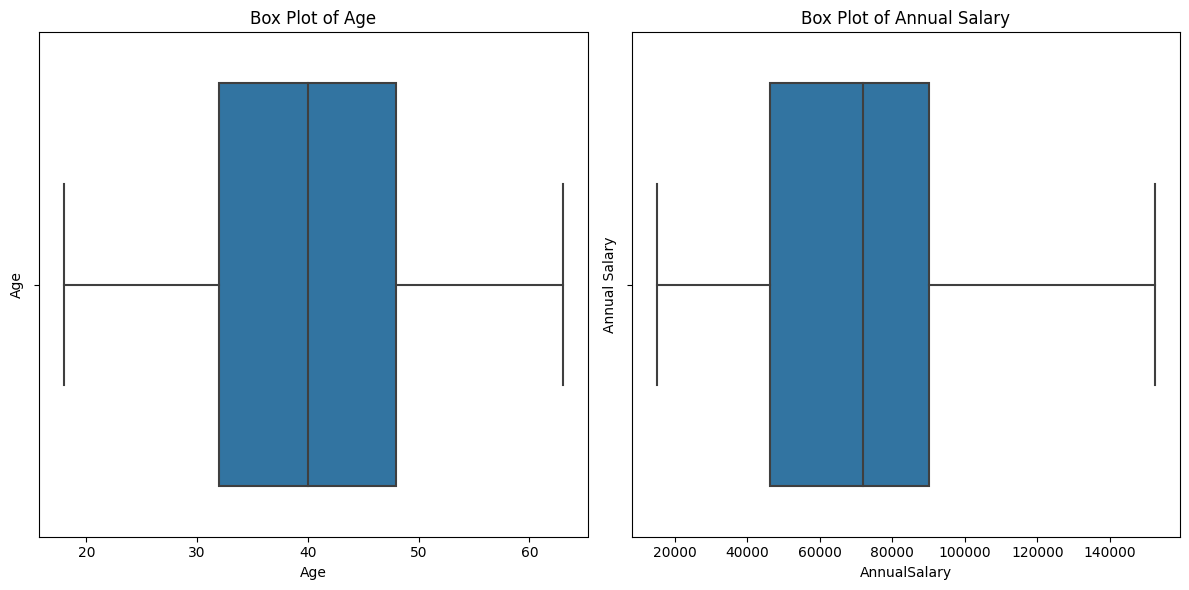

In [23]:
plt.figure(figsize=(12, 6))  



plt.subplot(1, 2, 1)  
sns.boxplot(x='Age', data=df, orient='v')  
plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.subplot(1, 2, 2) 
sns.boxplot(x='AnnualSalary', data=df, orient='v')  
plt.title('Box Plot of Annual Salary')
plt.ylabel('Annual Salary')

plt.tight_layout()  
plt.show()

# Create a heatmap

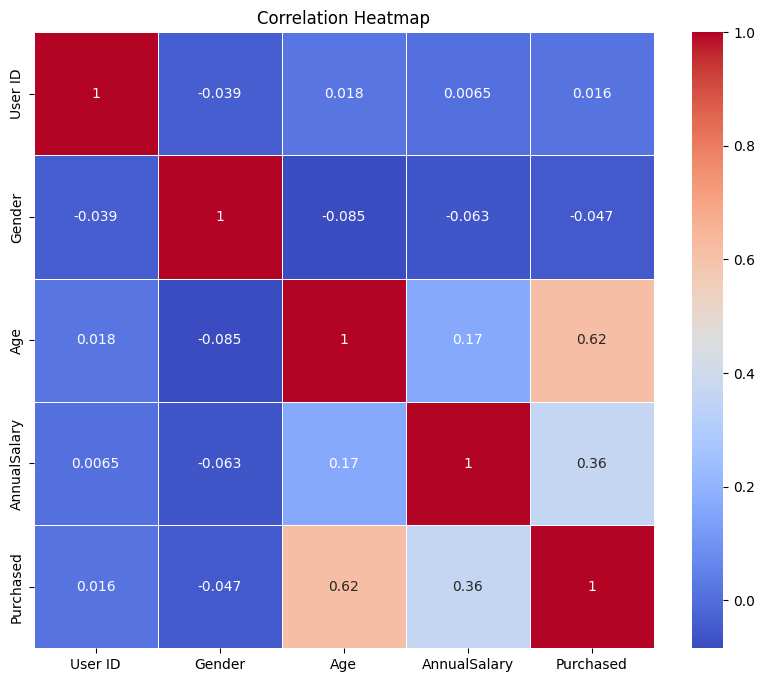

In [24]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()